# Word Embeddings for Sentiment Analysis

This notebook explains how to add the embeddings layer to the neural network. We will train our own word embeddings using a simple Keras model for a sentiment classification task.

Steps include:
1. Downloading data from tensorflow dataset.
2. Segregating training and testing sentences & labels.
3. Data preparation to padded sequences
4. Defining out Keras model with an Embedding layer.
5. Train the model and explore the weights from the embedding layer.


In [3]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Downloading the TensorFlow `imdb_review` dataset

> Make sure tensorflow_datasets is installed

In [5]:
##load the imdb reviews dataset

data, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete88Z1FX/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete88Z1FX/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete88Z1FX/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


## Segregating training and testing sets

In [6]:
# segregate training and test sets
train_data, test_data = data['train'], data['test']

# create empty list to store sentences and labesl
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [7]:
##iterate over the train data to extract sentences and labels
for s, l in train_data:
  train_sentences.append(s.numpy().decode('utf8'))
  train_labels.append(l.numpy())

## iterate over the test data to extract sentences and labels
for s, l in test_data:
  test_sentences.append(s.numpy().decode('utf8'))
  test_labels.append(l.numpy())

In [10]:
# convert labels lists into numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Data preparation - setting up the tokenizer

In [11]:
##define the parameters for the tokenizing and padding
vocab_size = 10000
oov_token = '<OOV>'
embedding_dim = 16
max_length = 150
padding_type = 'post'
trunc_type = 'post'

In [13]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# training sequences and padding
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# testing sequences and padding
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs, maxlen=max_length)

In [22]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [19]:
print(train_sentences[1])

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.


In [20]:
print(train_padded[1])

[  11   26   75  571    6  805 2354  313  106   19   12    7  629  686
    6    4 2219    5  181  584   64 1454  110 2263    3 3951   21    2
    1    3  258   41 4677    4  174  188   21   12 4078   11 1578 2354
   86    2   20   14 1907    2  112  940   14 1811 1340  548    3  355
  181  466    6  591   19   17   55 1817    5   49   14 4044   96   40
  136   11  972   11  201   26 1046  171    5    2   20   19   11  294
    2 2155    5   10    3  283   41  466    6  591    5   92  203    1
  207   99  145 4382   16  230  332   11 2486  384   12   20   31   30
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]


In [21]:
print(decode_review(train_padded[1]))

i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [23]:
print(train_sentences[1])
print(train_padded[1])
print(decode_review(train_padded[1]))

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.
[  11   26   75  571    6  805 2354  313  106   19   12    7  629  686
    6    4 2219    5  181  584   64 1454  110 2263    3 3951   21    2
    1    3  258   41 4677    4  174  188   21   12 4078   11 1578 2354
   86    2   20   14 1907    2  112  940   14 1811 1340  548    3  355
  181  466    6  591   19   17   55 1817    5   49   14 4044   96   40
  136   11  972   11  201  

## Define the Neural Network with Embedding layer

1. Use the Sequential API.
2. Add an embedding input layer of input size equal to vocabulary size.
3. Add a flatten layer, and two dense layers.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [31]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

##compile the model with loss function, optimizer and metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model Training

In [38]:
num_epochs = 10
batch_size = 128

##train the model with training and validation set
history = model.fit(train_padded, train_labels,
          validation_data=(test_padded, test_labels),
          epochs=num_epochs,
          batch_size=batch_size)

Epoch 1/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6010 - val_accuracy: 0.8333
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.6227 - val_accuracy: 0.8326
Epoch 3/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6345 - val_accuracy: 0.8329
Epoch 4/10
196/196 [==============================] - 1s 5ms/step - loss: 8.6567e-04 - accuracy: 1.0000 - val_loss: 0.6528 - val_accuracy: 0.8324
Epoch 5/10
196/196 [==============================] - 1s 7ms/step - loss: 6.9341e-04 - accuracy: 1.0000 - val_loss: 0.6603 - val_accuracy: 0.8333
Epoch 6/10
196/196 [==============================] - 1s 7ms/step - loss: 5.6548e-04 - accuracy: 1.0000 - val_loss: 0.6832 - val_accuracy: 0.8322
Epoch 7/10
196/196 [==============================] - 1s 6ms/step - loss: 4.6501e-04 - accuracy: 1.0000 - val_loss: 0.6910 - val_accurac

## Deriving weights from the embedding layer

In [39]:
##isolating the first embedding layer
layer_0 = model.layers[0]

##extracting learned weights
weights = layer_0.get_weights()[0]
print(weights.shape, '\n')# shape: (vocab_size, embedding_dim)
print(weights)

(10000, 16) 

[[-0.02778291 -0.0363193  -0.05731574 ...  0.00224022  0.01877305
  -0.01544347]
 [-0.03366388 -0.05611958 -0.11701646 ...  0.04751822  0.02156927
  -0.08503066]
 [ 0.05933816  0.00176836 -0.08721025 ...  0.07049305  0.05627723
  -0.07890802]
 ...
 [-0.01228877 -0.07619897  0.08095498 ... -0.00952588  0.07697123
   0.04217318]
 [-0.00361896 -0.04305289  0.0376399  ...  0.10521724 -0.04516917
  -0.06243995]
 [ 0.09917007 -0.10808343 -0.05809455 ...  0.11299336  0.03165273
   0.03822425]]


# Plot Graphs

In [44]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

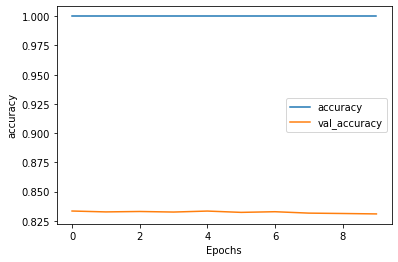

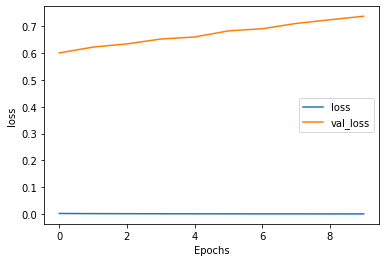

In [45]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')